LL restr.:   -2320.447  rhobar: 0.412  Parameters: 9
LL unrestr.: -2315.041  rhobar: 0.413  Parameters: 11
Likelihood ratio: 10.812
Output files:
piecewise_restricted~01.html
piecewise_unrestricted~01.html


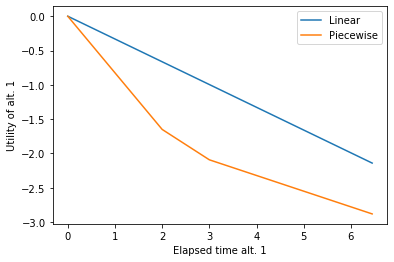

In [2]:
# Translated to .py by Marti Montesinos
# Version for PandasBiobgme by Michel Bierlaire
# Tue Oct 30 16:14:41 2018
 
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
from biogeme.expressions import Beta, DefineVariable, log
from biogeme.models import piecewiseVariables
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("airline.dat",'\t')
database = db.Database("airline",df)
pd.options.display.float_format = '{:.3g}'.format
globals().update(database.variables)


database.remove(ArrivalTimeHours_1   ==  -1)

# Choice
chosenAlternative = ( (  BestAlternative_1   *  1  ) + (  BestAlternative_2   *  2  ) ) + (  BestAlternative_3   *  3  )

#Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed
Constant1	 = Beta('Constant1',0,None,None,1)
Constant2	 = Beta('Constant2',0,None,None,0)
Constant3	 = Beta('Constant3',0,None,None,0)
Fare	 = Beta('Fare',0,None,None,0)
Legroom	 = Beta('Legroom',0,None,None,0)
SchedDE	 = Beta('SchedDE',0,None,None,0)
SchedDL	 = Beta('SchedDL',0,None,None,0)
Total_TT1	 = Beta('Total_TT1',0,None,None,0)
Total_TT1_1	 = Beta('Total_TT1_1',0,None,None,0)
Total_TT1_2	 = Beta('Total_TT1_2',0,None,None,0)
Total_TT1_3	 = Beta('Total_TT1_3',0,None,None,0)
Total_TT2	 = Beta('Total_TT2',0,None,None,0)
Total_TT3	 = Beta('Total_TT3',0,None,None,0)
 
# Define here arithmetic expressions for name that are not directly available from the data

DepartureTimeSensitive  = DefineVariable('DepartureTimeSensitive', q11_DepartureOrArrivalIsImportant   ==  1 ,database)
ArrivalTimeSensitive  = DefineVariable('ArrivalTimeSensitive', q11_DepartureOrArrivalIsImportant   ==  2 ,database)
Missing  = DefineVariable('Missing',(  q11_DepartureOrArrivalIsImportant   !=  1  ) * (  q11_DepartureOrArrivalIsImportant   !=  2  ),database)
DesiredDepartureTime  = DefineVariable('DesiredDepartureTime',q12_IdealDepTime ,database)
DesiredArrivalTime  = DefineVariable('DesiredArrivalTime',q13_IdealArrTime ,database)
ScheduledDelay_1  = DefineVariable('ScheduledDelay_1',(  DepartureTimeSensitive   * (  DepartureTimeMins_1   -  DesiredDepartureTime   ) ) + (  ArrivalTimeSensitive   * (  ArrivalTimeMins_1   -  DesiredArrivalTime   ) ),database)
ScheduledDelay_2  = DefineVariable('ScheduledDelay_2',(  DepartureTimeSensitive   * (  DepartureTimeMins_2   -  DesiredDepartureTime   ) ) + (  ArrivalTimeSensitive   * (  ArrivalTimeMins_2   -  DesiredArrivalTime   ) ),database)
ScheduledDelay_3  = DefineVariable('ScheduledDelay_3',(  DepartureTimeSensitive   * (  DepartureTimeMins_3   -  DesiredDepartureTime   ) ) + (  ArrivalTimeSensitive   * (  ArrivalTimeMins_3   -  DesiredArrivalTime   ) ),database)
Opt1_SchedDelayEarly  = DefineVariable('Opt1_SchedDelayEarly',(  -(ScheduledDelay_1 )  * (  ScheduledDelay_1   <  0  ) ) /  60 ,database)
Opt2_SchedDelayEarly  = DefineVariable('Opt2_SchedDelayEarly',(  -(ScheduledDelay_2 )  * (  ScheduledDelay_2   <  0  ) ) /  60 ,database)
Opt3_SchedDelayEarly  = DefineVariable('Opt3_SchedDelayEarly',(  -(ScheduledDelay_3 )  * (  ScheduledDelay_3   <  0  ) ) /  60 ,database)
Opt1_SchedDelayLate  = DefineVariable('Opt1_SchedDelayLate',(  ScheduledDelay_1   * (  ScheduledDelay_1   >  0  ) ) /  60 ,database)
Opt2_SchedDelayLate  = DefineVariable('Opt2_SchedDelayLate',(  ScheduledDelay_2   * (  ScheduledDelay_2   >  0  ) ) /  60 ,database)
Opt3_SchedDelayLate  = DefineVariable('Opt3_SchedDelayLate',(  ScheduledDelay_3   * (  ScheduledDelay_3   >  0  ) ) /  60 ,database)

# Variables for the piecewise linear specification
thresholds = [None,2,3,None]
pw_tt = piecewiseVariables(TripTimeHours_1 ,thresholds)

TripTimeHours_1_1 = DefineVariable('TripTimeHours_1_1', pw_tt[0],database)
TripTimeHours_1_2 = DefineVariable('TripTimeHours_1_2', pw_tt[1],database)
TripTimeHours_1_3 = DefineVariable('TripTimeHours_1_3', pw_tt[2],database)

av = {1: 1,2: 1,3: 1}

# Utilities restricted model
M1_Opt1 = Constant1 + Fare * Fare_1 + Legroom * Legroom_1 + SchedDE * Opt1_SchedDelayEarly + SchedDL * Opt1_SchedDelayLate + Total_TT1 * TripTimeHours_1
M1_Opt2 = Constant2 + Fare * Fare_2 + Legroom * Legroom_2 + SchedDE * Opt2_SchedDelayEarly + SchedDL * Opt2_SchedDelayLate + Total_TT2 * TripTimeHours_2
M1_Opt3 = Constant3 + Fare * Fare_3 + Legroom * Legroom_3 + SchedDE * Opt3_SchedDelayEarly + SchedDL * Opt3_SchedDelayLate + Total_TT3 * TripTimeHours_3
M1_V = {1: M1_Opt1,2: M1_Opt2,3: M1_Opt3}
M1_logprob = models.loglogit(M1_V,av,chosenAlternative)

# Utilities unrestricted model
M2_Opt1 = Constant1 + Fare * Fare_1 + Legroom * Legroom_1 + SchedDE * Opt1_SchedDelayEarly + SchedDL * Opt1_SchedDelayLate + Total_TT1_1 * TripTimeHours_1_1 + Total_TT1_2 * TripTimeHours_1_2 + Total_TT1_3 * TripTimeHours_1_3
M2_Opt2 = Constant2 + Fare * Fare_2 + Legroom * Legroom_2 + SchedDE * Opt2_SchedDelayEarly + SchedDL * Opt2_SchedDelayLate + Total_TT2 * TripTimeHours_2
M2_Opt3 = Constant3 + Fare * Fare_3 + Legroom * Legroom_3 + SchedDE * Opt3_SchedDelayEarly + SchedDL * Opt3_SchedDelayLate + Total_TT3 * TripTimeHours_3
M2_V = {1: M2_Opt1,2: M2_Opt2,3: M2_Opt3}
M2_logprob = models.loglogit(M2_V,av,chosenAlternative)

biogeme_M1  = bio.BIOGEME(database,M1_logprob)
biogeme_M1.modelName = "piecewise_restricted"
results_M1 = biogeme_M1.estimate()
ll_M1 = results_M1.data.logLike

biogeme_M2  = bio.BIOGEME(database,M2_logprob)
biogeme_M2.modelName = "piecewise_unrestricted"
results_M2 = biogeme_M2.estimate()
ll_M2 = results_M2.data.logLike

print(f"LL restr.:   {ll_M1:.3f}  rhobar: {results_M1.data.rhoBarSquare:.3f}  Parameters: {results_M1.data.nparam}")
print(f"LL unrestr.: {ll_M2:.3f}  rhobar: {results_M2.data.rhoBarSquare:.3f}  Parameters: {results_M2.data.nparam}")
lr = -2 * (ll_M1 - ll_M2)
print(f"Likelihood ratio: {lr:.3f}")
print("Output files:")
print(f"{results_M1.data.htmlFileName}")
print(f"{results_M2.data.htmlFileName}")

def utilLinear(tt):
    beta = ['Total_TT1']
    betaValue = results_M1.getBetaValues(beta)
    return betaValue['Total_TT1'] * tt

def utilPW(tt):
    piecewise_tt = piecewiseVariables(tt,thresholds)
    betas = ['Total_TT1_1','Total_TT1_2','Total_TT1_3']
    betaValues = results_M2.getBetaValues(betas)
    V = betaValues['Total_TT1_1'] * piecewise_tt[0].getValue() + betaValues['Total_TT1_2'] * piecewise_tt[1].getValue() + betaValues['Total_TT1_3'] * piecewise_tt[2].getValue() 
    return V

travelTime = np.arange(0,6.5,0.05)
vl = [utilLinear(t) for t in travelTime]
vpw = [utilPW(t) for t in travelTime]

fig, ax = plt.subplots()
ax.plot(travelTime,vl,label='Linear')
ax.plot(travelTime,vpw,label='Piecewise')
ax.legend()
plt.xlabel("Elapsed time alt. 1")
plt.ylabel("Utility of alt. 1")
plt.show()

